In [1]:
!pip install -U gretel-client

In [2]:
import pandas as pd
import numpy as np
from getpass import getpass
from gretel_client import configure_session, ClientConfig, create_project
from gretel_client.helpers import poll
import json
import yaml

In [3]:
df_students = pd.read_csv("./dataset/student_engagement_level.csv")
df_students.shape

(486, 14)

In [4]:
df_students = df_students.rename(columns={"# Quiz Reviews before submission": "reviews", 
                   "Assignment 3 lateness indicator": "a1",
                  "Assignment 3 duration to submit (in hours)": "a2",
                  "Average time to submit assignment (in hours)": "a3",
                  "Engagement Level": "engagement"})
df_students = df_students[["reviews", "a1", "a2", "a3", "engagement"]]

In [5]:
df_students = df_students.assign(gender=np.random.randint(2, size=df_students.index.size))
df_students = df_students.assign(grade=np.random.randint(3, size=df_students.index.size))
df_students.head()

,reviews,a1,a2,a3,engagement,gender,grade
0,3,0,116.166667,129.016667,H,0,1
1,4,0,217.750000,235.955556,M,0,2
2,3,0,260.333333,221.888889,M,1,0
3,6,0,271.216667,286.088889,M,1,1
4,1,0,260.733333,274.172222,M,0,2


In [9]:
configure_session(ClientConfig(api_key=getpass(prompt="Enter Gretel API key"), 
                               endpoint="https://api.gretel.cloud"))
# key grtu3fe15bbc3de08089a923e94ed388883ccac29ba7227f938d8fb500ad531a9960

Enter Gretel API key········


In [10]:
project = create_project(display_name="synthetic-data-students")

with open("gretel-config.yml", 'r') as stream:
    config = yaml.safe_load(stream)

# Set the model epochs to 50
config['models'][0]['synthetics']['params']['epochs'] = 60

config['models'][0]['synthetics']['generate']['num_records'] = 10000

print(json.dumps(config, indent=2))

{
  "schema_version": "1.0",
  "models": [
    {
      "synthetics": {
        "data_source": "__tmp__",
        "params": {
          "epochs": 60,
          "batch_size": 64,
          "vocab_size": 20000,
          "reset_states": false,
          "learning_rate": 0.01,
          "rnn_units": 256,
          "dropout_rate": 0.2,
          "overwrite": true,
          "early_stopping": true,
          "gen_temp": 1.0,
          "predict_batch_size": 64,
          "validation_split": false,
          "dp": false,
          "dp_noise_multiplier": 0.001,
          "dp_l2_norm_clip": 5.0,
          "dp_microbatches": 1,
          "data_upsample_limit": 10000
        },
        "validators": {
          "in_set_count": 10,
          "pattern_count": 10
        },
        "generate": {
          "num_records": 10000,
          "max_invalid": null
        },
        "privacy_filters": {
          "outliers": "medium",
          "similarity": "medium"
        }
      }
    }
  ]
}


In [11]:
df_students.to_csv('./dataset/clean_student_engagement_level.csv', index=False)
model = project.create_model_obj(model_config=config)
model.data_source = "./dataset/clean_student_engagement_level.csv"
model.submit(upload_data_source=True)
poll(model)

synthetic_df = pd.read_csv(model.get_artifact_link("data_preview"), compression='gzip')
synthetic_df

INFO: Starting poller


{
    "uid": "61dc5e6da022878f14030d6c",
    "model_name": "naughty-sweet-chimpanzee",
    "runner_mode": "cloud",
    "user_id": "61d90774bff621712241f5de",
    "project_id": "61dc5e5cc5d02c2938f1ad56",
    "status_history": {
        "created": "2022-01-10T16:27:25.115359Z"
    },
    "last_modified": "2022-01-10T16:27:25.333446Z",
    "status": "created",
    "last_active_hb": null,
    "duration_minutes": null,
    "error_msg": null,
    "error_id": null,
    "traceback": null,
    "container_image": "074762682575.dkr.ecr.us-west-2.amazonaws.com/gretelai/synthetics@sha256:d05f26989b324e5c6267f22b3053377c562dc1bee122aa1af20e8eb7ad70651e",
    "model_type": "synthetics",
    "config": {
        "schema_version": "1.0",
        "name": null,
        "models": [
            {
                "synthetics": {
                    "params": {
                        "field_delimiter": null,
                        "epochs": 60,
                        "batch_size": 64,
                    

INFO: Status is created. Model creation has been queued.
INFO: Status is pending. A Gretel Cloud worker is being allocated to begin model creation.
INFO: Status is active. A worker has started creating your model!
2022-01-10T16:27:48.589282Z  Starting synthetic model training
2022-01-10T16:27:48.591500Z  Loading training data
2022-01-10T16:27:48.868768Z  Training data loaded
{
    "record_count": 486,
    "field_count": 7,
    "upsample_count": 9514
}
2022-01-10T16:27:52.417304Z  Creating semantic validators and preparing training data
2022-01-10T16:28:00.254065Z  Beginning ML model training
2022-01-10T16:28:07.701553Z  Training epoch completed
{
    "epoch": 0,
    "accuracy": 0.242,
    "loss": 3.9309,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2022-01-10T16:28:08.665227Z  Training epoch completed
{
    "epoch": 1,
    "accuracy": 0.2377,
    "loss": 3.5017,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2022-01-10T16:28:09.635989Z  Training epoch complete

2022-01-10T16:28:50.522371Z  Training epoch completed
{
    "epoch": 44,
    "accuracy": 0.8936,
    "loss": 0.4233,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2022-01-10T16:28:51.470500Z  Training epoch completed
{
    "epoch": 45,
    "accuracy": 0.8936,
    "loss": 0.4228,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2022-01-10T16:28:52.455925Z  Training epoch completed
{
    "epoch": 46,
    "accuracy": 0.8935,
    "loss": 0.4202,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2022-01-10T16:28:53.416132Z  Training epoch completed
{
    "epoch": 47,
    "accuracy": 0.894,
    "loss": 0.4203,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2022-01-10T16:28:54.403614Z  Training epoch completed
{
    "epoch": 48,
    "accuracy": 0.8939,
    "loss": 0.4187,
    "val_accuracy": 0,
    "val_loss": 0,
    "batch": 0
}
2022-01-10T16:28:55.356250Z  Training epoch completed
{
    "epoch": 49,
    "accuracy": 0.8936,
    "loss": 0.42,
    "v

2022-01-10T16:31:04.696117Z  Generation in progress
{
    "current_valid_count": 5946,
    "current_invalid_count": 328,
    "new_valid_count": 1042,
    "new_invalid_count": 47,
    "completion_percent": 64.12
}
2022-01-10T16:31:09.702490Z  Generation in progress
{
    "current_valid_count": 7028,
    "current_invalid_count": 385,
    "new_valid_count": 1082,
    "new_invalid_count": 57,
    "completion_percent": 75.79
}
2022-01-10T16:31:14.709353Z  Generation in progress
{
    "current_valid_count": 8073,
    "current_invalid_count": 439,
    "new_valid_count": 1045,
    "new_invalid_count": 54,
    "completion_percent": 87.06
}
2022-01-10T16:31:19.715244Z  Generation in progress
{
    "current_valid_count": 9098,
    "current_invalid_count": 503,
    "new_valid_count": 1025,
    "new_invalid_count": 64,
    "completion_percent": 98.11
}
2022-01-10T16:31:20.717017Z  Generation in progress
{
    "current_valid_count": 9273,
    "current_invalid_count": 510,
    "new_valid_count": 175,

2022-01-10T16:33:57.814361Z  Generation in progress
{
    "current_valid_count": 4819,
    "current_invalid_count": 302,
    "new_valid_count": 1036,
    "new_invalid_count": 53,
    "completion_percent": 60.0
}
2022-01-10T16:34:02.819228Z  Generation in progress
{
    "current_valid_count": 5856,
    "current_invalid_count": 354,
    "new_valid_count": 1037,
    "new_invalid_count": 52,
    "completion_percent": 72.92
}
2022-01-10T16:34:07.828688Z  Generation in progress
{
    "current_valid_count": 6942,
    "current_invalid_count": 398,
    "new_valid_count": 1086,
    "new_invalid_count": 44,
    "completion_percent": 86.44
}
2022-01-10T16:34:12.837529Z  Generation in progress
{
    "current_valid_count": 8011,
    "current_invalid_count": 437,
    "new_valid_count": 1069,
    "new_invalid_count": 39,
    "completion_percent": 99.75
}
2022-01-10T16:34:13.839260Z  Generation in progress
{
    "current_valid_count": 8031,
    "current_invalid_count": 439,
    "new_valid_count": 20,
 

2022-01-10T16:36:45.423928Z  Privacy filtering removed 6645 records, generating replacement records
{
    "filtered_outliers": 80,
    "filtered_similarity": 6565
}
2022-01-10T16:36:50.431572Z  Generation in progress
{
    "current_valid_count": 688,
    "current_invalid_count": 84,
    "new_valid_count": 688,
    "new_invalid_count": 84,
    "completion_percent": 10.35
}
2022-01-10T16:36:55.444325Z  Generation in progress
{
    "current_valid_count": 1728,
    "current_invalid_count": 129,
    "new_valid_count": 1040,
    "new_invalid_count": 45,
    "completion_percent": 26.0
}
2022-01-10T16:37:00.450865Z  Generation in progress
{
    "current_valid_count": 2836,
    "current_invalid_count": 172,
    "new_valid_count": 1108,
    "new_invalid_count": 43,
    "completion_percent": 42.68
}
2022-01-10T16:37:05.456354Z  Generation in progress
{
    "current_valid_count": 3857,
    "current_invalid_count": 239,
    "new_valid_count": 1021,
    "new_invalid_count": 67,
    "completion_perce

2022-01-10T16:39:33.016371Z  Generation in progress
{
    "current_valid_count": 687,
    "current_invalid_count": 83,
    "new_valid_count": 687,
    "new_invalid_count": 83,
    "completion_percent": 12.36
}
2022-01-10T16:39:38.023216Z  Generation in progress
{
    "current_valid_count": 1775,
    "current_invalid_count": 145,
    "new_valid_count": 1088,
    "new_invalid_count": 62,
    "completion_percent": 31.94
}
2022-01-10T16:39:43.029907Z  Generation in progress
{
    "current_valid_count": 2816,
    "current_invalid_count": 192,
    "new_valid_count": 1041,
    "new_invalid_count": 47,
    "completion_percent": 50.67
}
2022-01-10T16:39:48.035260Z  Generation in progress
{
    "current_valid_count": 3861,
    "current_invalid_count": 236,
    "new_valid_count": 1045,
    "new_invalid_count": 44,
    "completion_percent": 69.47
}
2022-01-10T16:39:53.041394Z  Generation in progress
{
    "current_valid_count": 4892,
    "current_invalid_count": 292,
    "new_valid_count": 1031,
 

2022-01-10T16:42:10.327396Z  Privacy filtering removed 4436 records, generating replacement records
{
    "filtered_outliers": 62,
    "filtered_similarity": 4374
}
2022-01-10T16:42:15.333550Z  Generation in progress
{
    "current_valid_count": 699,
    "current_invalid_count": 70,
    "new_valid_count": 699,
    "new_invalid_count": 70,
    "completion_percent": 15.76
}
2022-01-10T16:42:20.340277Z  Generation in progress
{
    "current_valid_count": 1749,
    "current_invalid_count": 108,
    "new_valid_count": 1050,
    "new_invalid_count": 38,
    "completion_percent": 39.43
}
2022-01-10T16:42:25.345789Z  Generation in progress
{
    "current_valid_count": 2785,
    "current_invalid_count": 159,
    "new_valid_count": 1036,
    "new_invalid_count": 51,
    "completion_percent": 62.78
}
2022-01-10T16:42:30.351596Z  Generation in progress
{
    "current_valid_count": 3817,
    "current_invalid_count": 215,
    "new_valid_count": 1032,
    "new_invalid_count": 56,
    "completion_perc

2022-01-10T16:44:51.149860Z  Generation in progress
{
    "current_valid_count": 1744,
    "current_invalid_count": 114,
    "new_valid_count": 1042,
    "new_invalid_count": 48,
    "completion_percent": 51.17
}
2022-01-10T16:44:56.155304Z  Generation in progress
{
    "current_valid_count": 2784,
    "current_invalid_count": 162,
    "new_valid_count": 1040,
    "new_invalid_count": 48,
    "completion_percent": 81.69
}
2022-01-10T16:44:59.158263Z  Generation in progress
{
    "current_valid_count": 3408,
    "current_invalid_count": 195,
    "new_valid_count": 624,
    "new_invalid_count": 33,
    "completion_percent": 100.0
}
2022-01-10T16:44:59.624850Z  Privacy filtering removed 3287 records, generating replacement records
{
    "filtered_outliers": 40,
    "filtered_similarity": 3247
}
2022-01-10T16:45:04.630995Z  Generation in progress
{
    "current_valid_count": 701,
    "current_invalid_count": 68,
    "new_valid_count": 701,
    "new_invalid_count": 68,
    "completion_perce

2022-01-10T16:47:17.017380Z  Generation in progress
{
    "current_valid_count": 690,
    "current_invalid_count": 78,
    "new_valid_count": 690,
    "new_invalid_count": 78,
    "completion_percent": 28.56
}
2022-01-10T16:47:22.022600Z  Generation in progress
{
    "current_valid_count": 1720,
    "current_invalid_count": 136,
    "new_valid_count": 1030,
    "new_invalid_count": 58,
    "completion_percent": 71.19
}
2022-01-10T16:47:26.026700Z  Generation in progress
{
    "current_valid_count": 2416,
    "current_invalid_count": 176,
    "new_valid_count": 696,
    "new_invalid_count": 40,
    "completion_percent": 100.0
}
2022-01-10T16:47:26.498632Z  Privacy filtering removed 2326 records, generating replacement records
{
    "filtered_outliers": 18,
    "filtered_similarity": 2308
}
2022-01-10T16:47:31.506240Z  Generation in progress
{
    "current_valid_count": 744,
    "current_invalid_count": 87,
    "new_valid_count": 744,
    "new_invalid_count": 87,
    "completion_percent"

2022-01-10T16:49:29.658545Z  Privacy filtering removed 1638 records, generating replacement records
{
    "filtered_outliers": 21,
    "filtered_similarity": 1617
}
2022-01-10T16:49:34.664382Z  Generation in progress
{
    "current_valid_count": 619,
    "current_invalid_count": 88,
    "new_valid_count": 619,
    "new_invalid_count": 88,
    "completion_percent": 37.79
}
2022-01-10T16:49:39.670746Z  Generation in progress
{
    "current_valid_count": 1638,
    "current_invalid_count": 145,
    "new_valid_count": 1019,
    "new_invalid_count": 57,
    "completion_percent": 100.0
}
2022-01-10T16:49:40.147753Z  Privacy filtering removed 1573 records, generating replacement records
{
    "filtered_outliers": 18,
    "filtered_similarity": 1555
}
2022-01-10T16:49:45.154504Z  Generation in progress
{
    "current_valid_count": 691,
    "current_invalid_count": 77,
    "new_valid_count": 691,
    "new_invalid_count": 77,
    "completion_percent": 43.93
}
2022-01-10T16:49:50.161446Z  Generati

2022-01-10T16:51:33.452445Z  Privacy filtering removed 955 records, generating replacement records
{
    "filtered_outliers": 11,
    "filtered_similarity": 944
}
2022-01-10T16:51:38.458370Z  Generation in progress
{
    "current_valid_count": 687,
    "current_invalid_count": 82,
    "new_valid_count": 687,
    "new_invalid_count": 82,
    "completion_percent": 71.94
}
2022-01-10T16:51:40.464263Z  Generation in progress
{
    "current_valid_count": 955,
    "current_invalid_count": 93,
    "new_valid_count": 268,
    "new_invalid_count": 11,
    "completion_percent": 100.0
}
2022-01-10T16:51:40.931008Z  Privacy filtering removed 921 records, generating replacement records
{
    "filtered_outliers": 10,
    "filtered_similarity": 911
}
2022-01-10T16:51:45.942986Z  Generation in progress
{
    "current_valid_count": 620,
    "current_invalid_count": 84,
    "new_valid_count": 620,
    "new_invalid_count": 84,
    "completion_percent": 67.32
}
2022-01-10T16:51:47.948211Z  Generation in p

2022-01-10T16:53:21.579588Z  Privacy filtering removed 464 records, generating replacement records
{
    "filtered_outliers": 9,
    "filtered_similarity": 455
}
2022-01-10T16:53:25.584010Z  Generation in progress
{
    "current_valid_count": 464,
    "current_invalid_count": 73,
    "new_valid_count": 464,
    "new_invalid_count": 73,
    "completion_percent": 100.0
}
2022-01-10T16:53:26.048902Z  Privacy filtering removed 446 records, generating replacement records
{
    "filtered_outliers": 5,
    "filtered_similarity": 441
}
2022-01-10T16:53:30.054619Z  Generation in progress
{
    "current_valid_count": 446,
    "current_invalid_count": 55,
    "new_valid_count": 446,
    "new_invalid_count": 55,
    "completion_percent": 100.0
}
2022-01-10T16:53:30.804653Z  Privacy filtering removed 432 records, generating replacement records
{
    "filtered_outliers": 4,
    "filtered_similarity": 428
}
2022-01-10T16:53:34.809836Z  Generation in progress
{
    "current_valid_count": 432,
    "cur

2022-01-10T16:54:52.854935Z  Generation in progress
{
    "current_valid_count": 159,
    "current_invalid_count": 57,
    "new_valid_count": 159,
    "new_invalid_count": 57,
    "completion_percent": 100.0
}
2022-01-10T16:54:53.353240Z  Privacy filtering removed 151 records, generating replacement records
{
    "filtered_outliers": 1,
    "filtered_similarity": 150
}
2022-01-10T16:54:56.357628Z  Generation in progress
{
    "current_valid_count": 151,
    "current_invalid_count": 53,
    "new_valid_count": 151,
    "new_invalid_count": 53,
    "completion_percent": 100.0
}
2022-01-10T16:54:56.829536Z  Privacy filtering removed 144 records, generating replacement records
{
    "filtered_outliers": 2,
    "filtered_similarity": 142
}
2022-01-10T16:54:59.833794Z  Generation in progress
{
    "current_valid_count": 144,
    "current_invalid_count": 51,
    "new_valid_count": 144,
    "new_invalid_count": 51,
    "completion_percent": 100.0
}
2022-01-10T16:55:00.302830Z  Privacy filtering

2022-01-10T16:56:02.817037Z  Privacy filtering removed 41 records, generating replacement records
{
    "filtered_outliers": 0,
    "filtered_similarity": 41
}
2022-01-10T16:56:04.820628Z  Generation in progress
{
    "current_valid_count": 41,
    "current_invalid_count": 48,
    "new_valid_count": 41,
    "new_invalid_count": 48,
    "completion_percent": 100.0
}
2022-01-10T16:56:05.281880Z  Privacy filtering removed 35 records, generating replacement records
{
    "filtered_outliers": 0,
    "filtered_similarity": 35
}
2022-01-10T16:56:08.286987Z  Generation in progress
{
    "current_valid_count": 35,
    "current_invalid_count": 43,
    "new_valid_count": 35,
    "new_invalid_count": 43,
    "completion_percent": 100.0
}
2022-01-10T16:56:08.770829Z  Privacy filtering removed 30 records, generating replacement records
{
    "filtered_outliers": 0,
    "filtered_similarity": 30
}
2022-01-10T16:56:10.774459Z  Generation in progress
{
    "current_valid_count": 30,
    "current_invali

HTTPError: HTTP Error 404: Not Found

In [ ]:
synthetic_df.to_csv('./dataset/gen_student_engagement_level.csv', index=False)

In [ ]:
df_students.append(synthetic_df, ignore_index = True).to_csv('./dataset/merged_student_engagement_level.csv', index=False)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch as T
from sklearn.metrics import confusion_matrix
import seaborn as sns
from prior_profile import ClassificationNet

device = "cuda" if T.cuda.is_available() else "cpu"

def next_batch(inputs, targets, batchSize):
    for i in range(0, inputs.shape[0], batchSize):
        yield (inputs[i:i + batchSize], targets[i:i + batchSize])

df_student = pd.read_csv("./dataset/merged_student_engagement_level.csv")

df_experiment =  df_student.copy()

df_experiment['engagement'] = df_experiment['engagement'].map(
    {'H': 2, 'M': 1, 'L': 0}
)

X = df_experiment.loc[:,["reviews", "a1", "a2", "a3", "gender", "grade"]].values
y = df_experiment.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# For low ressouces
X_train = X_train[0:700]
y_train = y_train[0:700]

X_test = T.FloatTensor(X_test)
y_train = T.LongTensor(y_train)
y_test = T.LongTensor(y_test)

scaler = StandardScaler()

X_train = T.from_numpy(scaler.fit_transform(X_train)).float()
X_test = T.from_numpy(scaler.fit_transform(X_test)).float()

epochs = 50
BATCH_SIZE = 10
losses = []
model = ClassificationNet().to(device)
optimizer = T.optim.Adam(model.parameters(), lr=0.001)
criterion = T.nn.CrossEntropyLoss()
j = 0

for (batchX, batchY) in next_batch(X_train, y_train, BATCH_SIZE):
    (batchX, batchY) = (batchX, batchY.to(device))
    j += 1
    
    for i in range(epochs):
        i += 1
        y_pred = model(batchX)
        loss = criterion(y_pred, batchY.long())
        losses.append(loss)
        
        if j % 5 == 0:
            print(f'epoch: {i} -> batch: {j} -> loss: {loss}')
            
        optimizer.zero_grad()
        loss.backward()
        T.nn.utils.clip_grad_norm_(model.parameters(), 5)
        optimizer.step()

epoch: 1 -> batch: 5 -> loss: 0.1757698655128479
epoch: 2 -> batch: 5 -> loss: 0.17317940294742584
epoch: 3 -> batch: 5 -> loss: 0.1704406440258026
epoch: 4 -> batch: 5 -> loss: 0.16757981479167938
epoch: 5 -> batch: 5 -> loss: 0.16462048888206482
epoch: 6 -> batch: 5 -> loss: 0.16158372163772583
epoch: 7 -> batch: 5 -> loss: 0.15849557518959045
epoch: 8 -> batch: 5 -> loss: 0.15537889301776886
epoch: 9 -> batch: 5 -> loss: 0.1522328108549118
epoch: 10 -> batch: 5 -> loss: 0.14907078444957733
epoch: 11 -> batch: 5 -> loss: 0.14590467512607574
epoch: 12 -> batch: 5 -> loss: 0.14274492859840393
epoch: 13 -> batch: 5 -> loss: 0.1396034061908722
epoch: 14 -> batch: 5 -> loss: 0.13649757206439972
epoch: 15 -> batch: 5 -> loss: 0.1334228366613388
epoch: 16 -> batch: 5 -> loss: 0.1303841769695282
epoch: 17 -> batch: 5 -> loss: 0.12738646566867828
epoch: 18 -> batch: 5 -> loss: 0.12438364326953888
epoch: 19 -> batch: 5 -> loss: 0.12141557037830353
epoch: 20 -> batch: 5 -> loss: 0.1184899806976

epoch: 1 -> batch: 25 -> loss: 0.37957221269607544
epoch: 2 -> batch: 25 -> loss: 0.37888726592063904
epoch: 3 -> batch: 25 -> loss: 0.3773511052131653
epoch: 4 -> batch: 25 -> loss: 0.3750792145729065
epoch: 5 -> batch: 25 -> loss: 0.3721817135810852
epoch: 6 -> batch: 25 -> loss: 0.3687615394592285
epoch: 7 -> batch: 25 -> loss: 0.3649129867553711
epoch: 8 -> batch: 25 -> loss: 0.3607214391231537
epoch: 9 -> batch: 25 -> loss: 0.35626277327537537
epoch: 10 -> batch: 25 -> loss: 0.35160383582115173
epoch: 11 -> batch: 25 -> loss: 0.34680259227752686
epoch: 12 -> batch: 25 -> loss: 0.3419089913368225
epoch: 13 -> batch: 25 -> loss: 0.33696526288986206
epoch: 14 -> batch: 25 -> loss: 0.33200713992118835
epoch: 15 -> batch: 25 -> loss: 0.3270641267299652
epoch: 16 -> batch: 25 -> loss: 0.3221605718135834
epoch: 17 -> batch: 25 -> loss: 0.3173162639141083
epoch: 18 -> batch: 25 -> loss: 0.3125470280647278
epoch: 19 -> batch: 25 -> loss: 0.3082789480686188
epoch: 20 -> batch: 25 -> loss: 0

epoch: 1 -> batch: 45 -> loss: 0.02818886563181877
epoch: 2 -> batch: 45 -> loss: 0.028237631544470787
epoch: 3 -> batch: 45 -> loss: 0.028247054666280746
epoch: 4 -> batch: 45 -> loss: 0.028220826759934425
epoch: 5 -> batch: 45 -> loss: 0.028162572532892227
epoch: 6 -> batch: 45 -> loss: 0.02807549014687538
epoch: 7 -> batch: 45 -> loss: 0.027962815016508102
epoch: 8 -> batch: 45 -> loss: 0.027827376499772072
epoch: 9 -> batch: 45 -> loss: 0.02767188474535942
epoch: 10 -> batch: 45 -> loss: 0.02749883569777012
epoch: 11 -> batch: 45 -> loss: 0.027310501784086227
epoch: 12 -> batch: 45 -> loss: 0.02710891142487526
epoch: 13 -> batch: 45 -> loss: 0.02689596638083458
epoch: 14 -> batch: 45 -> loss: 0.02667342498898506
epoch: 15 -> batch: 45 -> loss: 0.02644280530512333
epoch: 16 -> batch: 45 -> loss: 0.026205558329820633
epoch: 17 -> batch: 45 -> loss: 0.02596287988126278
epoch: 18 -> batch: 45 -> loss: 0.025715947151184082
epoch: 19 -> batch: 45 -> loss: 0.02546577714383602
epoch: 20 ->

epoch: 1 -> batch: 65 -> loss: 0.0030368429142981768
epoch: 2 -> batch: 65 -> loss: 0.0030304582323879004
epoch: 3 -> batch: 65 -> loss: 0.003023234661668539
epoch: 4 -> batch: 65 -> loss: 0.0030150865204632282
epoch: 5 -> batch: 65 -> loss: 0.003006202634423971
epoch: 6 -> batch: 65 -> loss: 0.0029966533184051514
epoch: 7 -> batch: 65 -> loss: 0.0029864730313420296
epoch: 8 -> batch: 65 -> loss: 0.002975743031129241
epoch: 9 -> batch: 65 -> loss: 0.0029645818285644054
epoch: 10 -> batch: 65 -> loss: 0.0029529635794460773
epoch: 11 -> batch: 65 -> loss: 0.0029409711714833975
epoch: 12 -> batch: 65 -> loss: 0.0029286511708050966
epoch: 13 -> batch: 65 -> loss: 0.0029160859994590282
epoch: 14 -> batch: 65 -> loss: 0.0029032747261226177
epoch: 15 -> batch: 65 -> loss: 0.0028903118800371885
epoch: 16 -> batch: 65 -> loss: 0.0028771497309207916
epoch: 17 -> batch: 65 -> loss: 0.0028638343792408705
epoch: 18 -> batch: 65 -> loss: 0.002850496908649802
epoch: 19 -> batch: 65 -> loss: 0.0028370

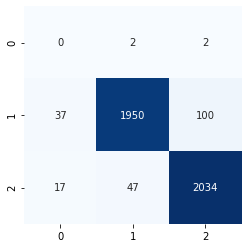

In [14]:
with T.no_grad():
    model.eval()
    pred = model(X_test)
    _, pr = T.max(pred, 1)
    
    '''
        Engagement level 
        'High': 2, 'Medium': 1, 'Low': 0
    '''
    conf_mat = confusion_matrix(pr.tolist(), y_test.tolist())
    sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

T.save(model, "./models/PriorProfile")